<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/Practical_3_BonusAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("customer-churn.csv")


In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
X = X.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.92      0.88      1036
         Yes       0.70      0.49      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



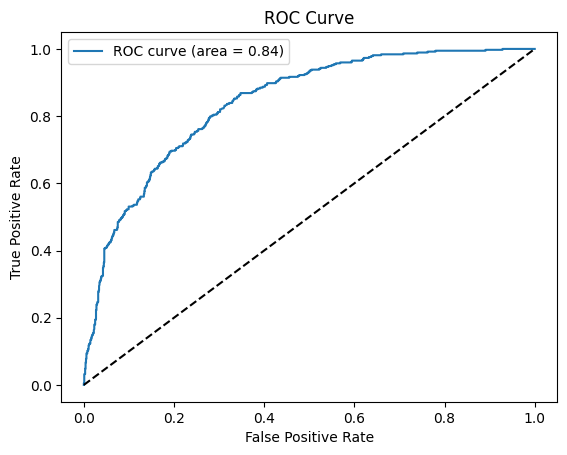

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='Yes')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

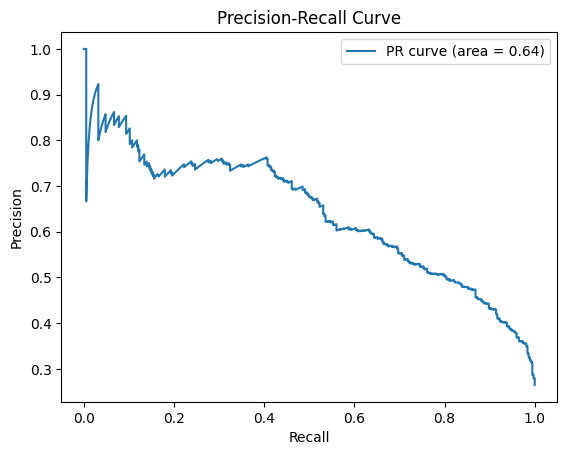

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label='Yes')
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f"PR curve (area = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()